<a href="https://colab.research.google.com/github/peremartra/llama-glu-expansion-pruning/blob/main/notebooks/04_3B_Graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GLU Pruning Research - Llama-3.2-3B Benchmark Analysis
## 04 - Visualization and Analysis of Benchmark Results

### Exploring the dichotomy between knowledge degradation and reasoning improvement
by [Pere Martra](https://github.com/peremartra)

[![Paper](https://img.shields.io/badge/OSF-Paper-blue?logo=osf&logoColor=white)](https://doi.org/10.31219/osf.io/qgxea)
[![GitHub](https://img.shields.io/badge/⭐_Star-OptiPFair-orange?logo=github&logoColor=white)](https://github.com/peremartra/optipfair)
[![PyPI](https://img.shields.io/pypi/v/optipfair?logo=python&logoColor=white&label=v)](https://pypi.org/project/optipfair/)

**Repository:** [github.com/peremartra/llama-glu-expansion-pruning](https://github.com/peremartra/llama-glu-expansion-pruning)

---

**Colab Environment:** CPU (no GPU required)

**Estimated Runtime:** ~5 minutes
## Objective
This notebook loads the complete evaluation results for the Llama-3.2-3B model from `llama_3b_complete_results_latest.json`.

The primary goal is to visualize the impact of pruning, using the **`expansion_rate`** as the primary independent variable (X-axis). We will explore the "capability trade-off" hypothesis: identifying which benchmarks degrade ("Fragile Capabilities") and which remain robust or even improve ("Robust Capabilities") as the expansion rate is reduced.

In [ ]:
# === 1. Setup & Imports ===

# Install necessary libraries
!pip install pandas matplotlib seaborn

# Import libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configure plots for better readability
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

In [ ]:
# === 2. Load Data ===

# IMPORTANT: Upload your 'llama_3b_complete_results_latest.json' file to the Colab environment first.

# Download utils.py from GitHub repository
!wget -q https://raw.githubusercontent.com/peremartra/llama-glu-expansion-pruning/main/results/llama_3b_complete_results_latest.json

# Verify download
import os
if os.path.exists('llama_3b_complete_results_latest.json'):
    print("✅ llama_3b_complete_results_latest.json downloaded successfully")
else:
    print("❌ Failed to download llama_3b_complete_results_latest.json")

# Load the JSON data
try:
    file_path = 'llama_3b_complete_results_latest.json' # Define file_path here
    with open(file_path, 'r') as f:
        data = json.load(f)
    print("File loaded successfully into 'data' variable.")
except Exception as e:
    print(f"ERROR: Could not read or parse JSON file. {e}")
    data = None

if data:
    models_data = data['models_evaluated']
    # print(json.dumps(models_data['baseline'], indent=2)) # Uncomment to inspect baseline data

✅ llama_3b_complete_results_latest.json downloaded successfully
File loaded successfully into 'data' variable.


In [ ]:
# === 3. Data Preprocessing ===
# Transform the nested JSON into a flat Pandas DataFrame for easy plotting.

all_results = []

if data:
    for model_key, v in models_data.items():
        results = v.get('results', {})
        row = {
            'model_name': v.get('name'),
            'expansion_rate': v.get('expansion_rate'),
            'pruning_pct': v.get('pruning_pct'),

            # Perplexity Metrics (Lower is better)
            'wikitext_ppl': results.get('wikitext', {}).get('word_perplexity,none'),
            'lambada_ppl': results.get('lambada_openai', {}).get('perplexity'),

            # Accuracy Metrics (Higher is better)
            'gsm8k_acc': results.get('gsm8k', {}).get('exact_match,strict-match'),
            'ifeval_acc': results.get('ifeval', {}).get('prompt_level_strict_acc,none'),
            'truthfulqa_mc2_acc': results.get('truthfulqa_mc2', {}).get('accuracy'),
            'musr_acc': results.get('leaderboard_musr', {}).get('acc_norm,none'),
            'mmlu_acc': results.get('mmlu', {}).get('accuracy'),
            'arc_acc': results.get('arc_challenge', {}).get('accuracy'),
            'hellaswag_acc': results.get('hellaswag', {}).get('accuracy'),
            'winogrande_acc': results.get('winogrande', {}).get('accuracy'),
            'piqa_acc': results.get('piqa', {}).get('accuracy'),
            'boolq_acc': results.get('boolq', {}).get('accuracy'),
            'truthfulqa_mc1_acc': results.get('truthfulqa_mc1', {}).get('accuracy')
        }
        all_results.append(row)

# Create DataFrame and sort by expansion_rate (descending) for correct line plots
df = pd.DataFrame(all_results)
df = df.sort_values(by='expansion_rate', ascending=False).reset_index(drop=True)

print("DataFrame created successfully:")
df

DataFrame created successfully:


,model_name,expansion_rate,pruning_pct,wikitext_ppl,lambada_ppl,gsm8k_acc,ifeval_acc,truthfulqa_mc2_acc,musr_acc,mmlu_acc,arc_acc,hellaswag_acc,winogrande_acc,piqa_acc,boolq_acc,truthfulqa_mc1_acc
0,Llama-3.2-3B,2.67,0,9.2628,3.95,0.2638,0.0943,0.3919,0.3638,0.5605,0.4241,0.5529,0.6953,0.7677,0.7294,0.2497
1,Llama-3.2-3B-pruned-10%,2.40,10,11.8759,6.11,0.1350,0.1312,0.3767,0.3730,0.4333,0.3780,0.5116,0.6748,0.7454,0.5046,0.2203
2,Llama-3.2-3B-pruned-20%,2.13,20,15.8608,8.16,0.0607,0.1220,0.4302,0.3439,0.2909,0.3456,0.4575,0.6385,0.7209,0.3972,0.2387
3,Llama-3.2-3B-pruned-30%,1.87,30,23.3515,14.72,0.0273,0.1534,0.4390,0.3373,0.2307,0.2807,0.3973,0.5927,0.6866,0.4269,0.2607
4,Llama-3.2-3B-pruned-40%,1.60,40,42.1811,51.02,0.0083,0.1645,0.4484,0.3558,0.2587,0.2423,0.3361,0.5572,0.6534,0.4208,0.2448
5,Llama-3.2-3B-pruned-50%,1.33,50,74.8280,240.72,0.0068,0.1627,0.4391,0.3545,0.2555,0.2278,0.3043,0.4886,0.6088,0.5119,0.2472
6,Llama-3.2-3B-pruned-60%,1.07,60,162.4732,5960.46,0.0106,0.1331,0.4574,0.3598,0.2589,0.1971,0.2781,0.4815,0.5696,0.5034,0.2387


In [ ]:
# === 4. Data Normalization ===
# Normalize scores relative to the baseline (Expansion Rate 4.0)
# This allows us to compare benchmarks with different scales (e.g., Accuracy vs. Perplexity)

baseline = df.iloc[0] # The first row is our baseline (ER 4.0)
df_norm = pd.DataFrame()
df_norm['expansion_rate'] = df['expansion_rate']

# --- Fragile Capabilities ---
# (Higher is better for all normalized scores)

# gsm8k: Higher is better (Accuracy)
df_norm['gsm8k_norm'] = (df['gsm8k_acc'] / baseline['gsm8k_acc']) * 100

# Perplexity: Lower is better. We invert the ratio (baseline / current) so that
# a *higher* PPL (worse) results in a *lower* normalized score (worse).
df_norm['lambada_norm'] = (baseline['lambada_ppl'] / df['lambada_ppl']) * 100
df_norm['wikitext_norm'] = (baseline['wikitext_ppl'] / df['wikitext_ppl']) * 100

# --- Robust Capabilities ---
# (Higher is better for all)
df_norm['ifeval_norm'] = (df['ifeval_acc'] / baseline['ifeval_acc']) * 100
df_norm['truthfulqa_mc2_norm'] = (df['truthfulqa_mc2_acc'] / baseline['truthfulqa_mc2_acc']) * 100
df_norm['musr_norm'] = (df['musr_acc'] / baseline['musr_acc']) * 100

# --- Create Aggregate Averages ---
df_norm['Fragile_Avg'] = df_norm[['gsm8k_norm', 'lambada_norm', 'wikitext_norm']].mean(axis=1)
df_norm['Robust_Avg'] = df_norm[['ifeval_norm', 'truthfulqa_mc2_norm', 'musr_norm']].mean(axis=1)

print("Normalized DataFrame:")
df_norm

Normalized DataFrame:


,expansion_rate,gsm8k_norm,lambada_norm,wikitext_norm,ifeval_norm,truthfulqa_mc2_norm,musr_norm,Fragile_Avg,Robust_Avg
0,2.67,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,2.40,51.175133,64.648118,77.996615,139.130435,96.121460,102.528862,64.606622,112.593585
2,2.13,23.009856,48.406863,58.400585,129.374337,109.772901,94.529962,43.272435,111.225733
3,1.87,10.348749,26.834239,39.666831,162.672322,112.018372,92.715778,25.616606,122.468824
4,1.60,3.146323,7.742062,21.959598,174.443266,114.416943,97.800990,10.949328,128.887066
5,1.33,2.577710,1.640911,12.378789,172.534464,112.043889,97.443650,5.532470,127.340668
6,1.07,4.018196,0.066270,5.701125,141.145281,116.713447,98.900495,3.261864,118.919741


## Section 1: Key Hypothesis Graphs (The "Trade-off")

This section focuses on our core hypothesis. By plotting normalized scores, we can directly visualize the trade-off: some capabilities (Fragile) collapse, while others (Robust) are maintained or even improve.

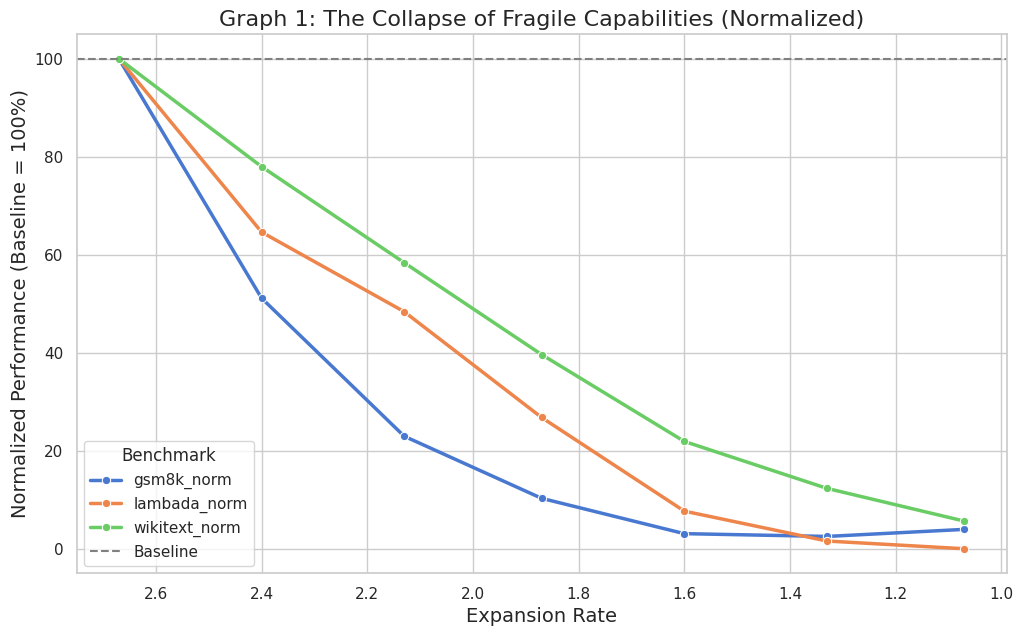

In [ ]:
# === Graph 1: The Collapse of Fragile Capabilities (Normalized) ===

df_fragile = df_norm.melt(id_vars=['expansion_rate'],
                           value_vars=['gsm8k_norm', 'lambada_norm', 'wikitext_norm'],
                           var_name='Benchmark',
                           value_name='Normalized Performance')

plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=df_fragile,
                  x='expansion_rate',
                  y='Normalized Performance',
                  hue='Benchmark',
                  marker='o',
                  linewidth=2.5)

ax.invert_xaxis() # Place 4.0 (baseline) on the left
ax.set_title('Graph 1: The Collapse of Fragile Capabilities (Normalized)')
ax.set_ylabel('Normalized Performance (Baseline = 100%)')
ax.set_xlabel('Expansion Rate')
ax.axhline(100, color='grey', linestyle='--', label='Baseline')
ax.legend(title='Benchmark')
plt.show()

**Graph 1: The Collapse of Fragile Capabilities (Normalized)**

This graph visualizes the differential degradation of knowledge-intensive benchmarks as the expansion rate decreases through structured width pruning of the Llama-3.2-3B model.

* **X-Axis (Expansion Rate):** Represents the GLU intermediate dimension to hidden dimension ratio, ranging from 2.67 (baseline, 0% pruning) down to 1.07 (60% pruning).

* **Y-Axis (Normalized Performance):** Shows benchmark performance normalized to 100% at baseline, allowing direct comparison of degradation curves across metrics with different absolute scales.

The three benchmarks exhibit distinct vulnerability profiles under width pruning.

GSM8K (blue line) demonstrates the steepest collapse, reaching near-zero performance (~3%) at 1.6 expansion rate and effectively collapsing by 1.33 expansion rate. This chain-of-thought reasoning task shows the highest fragility to MLP compression.

Lambada (orange line) displays moderate degradation, maintaining approximately 65% of baseline performance at 2.4 expansion rate and declining to near-zero only at the most extreme pruning level (1.07 expansion rate).

WikiText perplexity (green line) shows the most gradual degradation curve, retaining approximately 80% relative performance at 2.4 expansion rate and still maintaining ~5% at the lowest expansion rate tested.

These differential degradation patterns support the hypothesis that knowledge-intensive capabilities, particularly those requiring multi-step reasoning (GSM8K), are more dependent on MLP layer width than next-token prediction tasks like WikiText. The graph demonstrates that no single "safe" pruning threshold exists across all capabilities, as GSM8K begins substantial degradation beyond 2.4 expansion rate while WikiText remains relatively robust until 1.6 expansion rate.

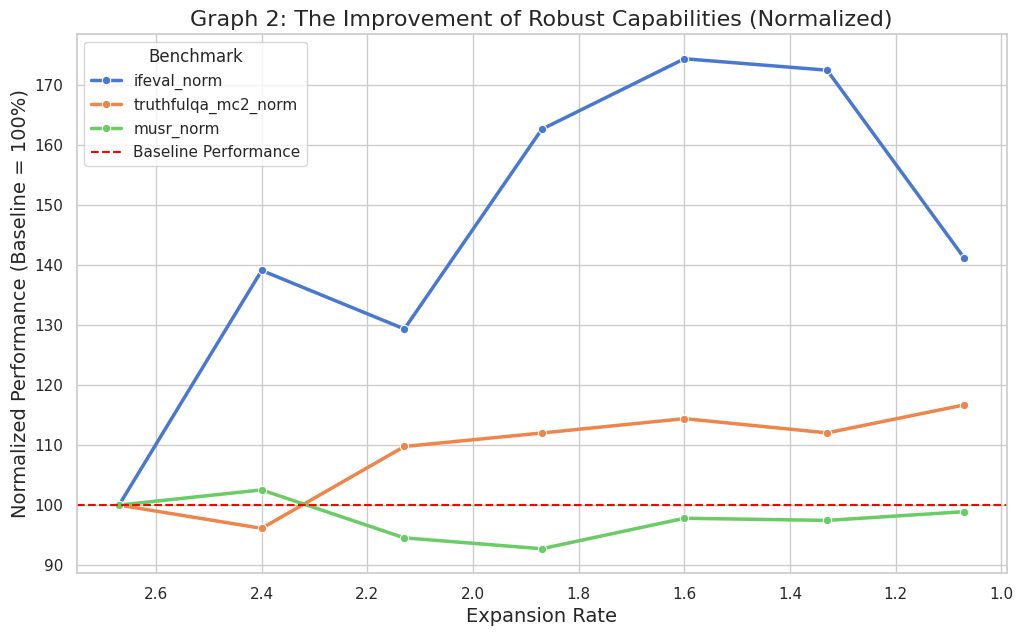

In [ ]:
# === Graph 2: The Improvement of Robust Capabilities (Normalized) ===

df_robust = df_norm.melt(id_vars=['expansion_rate'],
                         value_vars=['ifeval_norm', 'truthfulqa_mc2_norm', 'musr_norm'],
                         var_name='Benchmark',
                         value_name='Normalized Performance')

plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=df_robust,
                  x='expansion_rate',
                  y='Normalized Performance',
                  hue='Benchmark',
                  marker='o',
                  linewidth=2.5)

ax.invert_xaxis()
ax.set_title('Graph 2: The Improvement of Robust Capabilities (Normalized)')
ax.set_ylabel('Normalized Performance (Baseline = 100%)')
ax.set_xlabel('Expansion Rate')
ax.axhline(100, color='red', linestyle='--', label='Baseline Performance')
ax.legend(title='Benchmark')
plt.show()

**Graph 2: The Improvement of Robust Capabilities (Normalized)**

This graph visualizes the performance trajectory of instruction-following, truthfulness, and multi-step reasoning benchmarks under structured width pruning of the Llama-3.2-3B model.

**X-Axis (Expansion Rate):** Represents the GLU intermediate dimension to hidden dimension ratio, ranging from 2.67 (baseline, 0% pruning) down to 1.07 (60% pruning).

**Y-Axis (Normalized Performance):** Shows benchmark performance normalized to 100% at baseline, enabling direct comparison of improvement patterns across tasks with different absolute scales.

IFEval (blue line) demonstrates substantial improvement under moderate pruning, increasing from baseline (100%) to approximately 139% at 2.40 expansion rate (10% pruning), peaking at 174% at 1.60 expansion rate (40% pruning), before declining to 141% at the most extreme pruning level. This non-monotonic pattern suggests that selective MLP compression may reduce noise in instruction-following capabilities until excessive pruning degrades essential representational capacity.

TruthfulQA MC2 (orange line) exhibits modest but consistent improvement across all pruning levels, ranging from approximately 96% at 2.40 expansion rate to a peak of 117% at 1.07 expansion rate (60% pruning). The sustained improvement suggests that pruning may attenuate memorized false information stored in MLP weights while preserving truthfulness reasoning mechanisms.

MUSR (green line) maintains relatively stable performance across pruning levels, fluctuating between 93% and 103% of baseline, with a slight improvement at moderate pruning levels (2.40 expansion rate: 103%). The benchmark's resilience to width pruning indicates that multi-step reasoning capabilities are less dependent on MLP layer width than knowledge-intensive tasks.

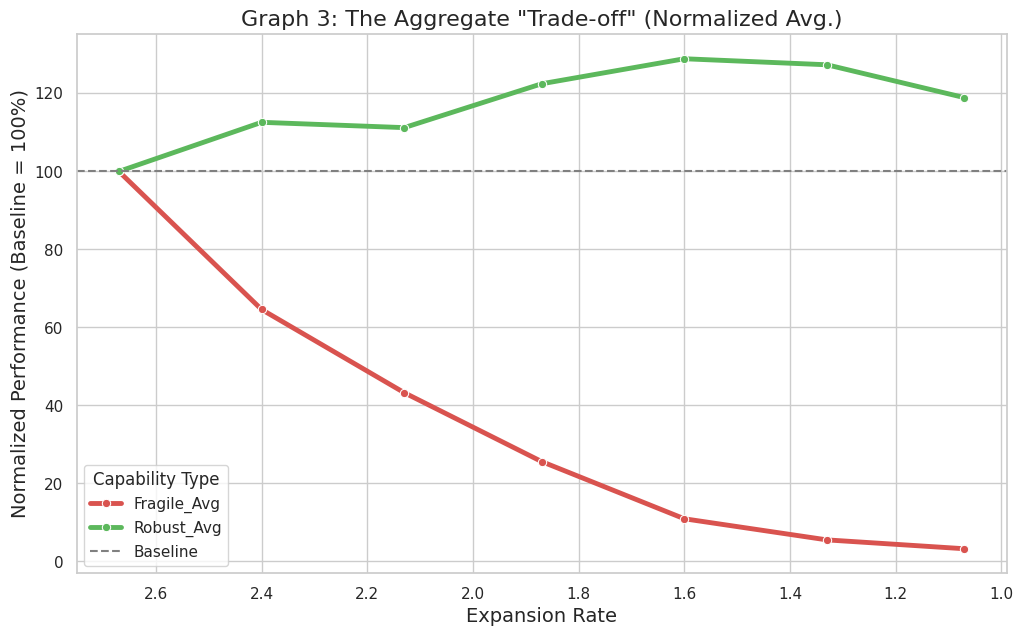

In [ ]:
# === Graph 3: The "Trade-off" Agregado (The Key Chart) ===

df_tradeoff = df_norm.melt(id_vars=['expansion_rate'],
                           value_vars=['Fragile_Avg', 'Robust_Avg'],
                           var_name='Capability Type',
                           value_name='Normalized Performance')

plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=df_tradeoff,
                  x='expansion_rate',
                  y='Normalized Performance',
                  hue='Capability Type',
                  marker='o',
                  linewidth=3.5,
                  palette=['#d9534f', '#5cb85c']) # Red for fragile, Green for robust

ax.invert_xaxis()
ax.set_title('Graph 3: The Aggregate "Trade-off" (Normalized Avg.)')
ax.set_ylabel('Normalized Performance (Baseline = 100%)')
ax.set_xlabel('Expansion Rate')
ax.axhline(100, color='grey', linestyle='--', label='Baseline')
ax.legend(title='Capability Type')
plt.show()

**Graph 3: The Aggregate "Trade-off" (Normalized Avg.)**

This graph visualizes the dichotomy between fragile and robust capabilities through aggregated performance metrics across pruning levels for the Llama-3.2-3B model.

* **X-Axis (Expansion Rate):** Represents the GLU intermediate dimension to hidden dimension ratio, ranging from 2.67 (baseline, 0% pruning) down to 1.07 (60% pruning).

* **Y-Axis (Normalized Performance):** Shows aggregate performance normalized to 100% at baseline, with Fragile_Avg comprising GSM8K, Lambada, and WikiText perplexity metrics, while Robust_Avg aggregates IFEval, TruthfulQA MC2, and MUSR scores.

The Fragile_Avg (red line) exhibits monotonic degradation from baseline (100%) to approximately 65% at 2.40 expansion rate (10% pruning), declining progressively to 44% at 2.13 expansion rate (20% pruning) and reaching near-collapse at 3% by 1.07 expansion rate (60% pruning). This steep degradation curve confirms that knowledge-intensive capabilities stored in MLP weights deteriorate rapidly under width pruning.

The Robust_Avg (green line) demonstrates consistent improvement across all pruning levels, rising from baseline (100%) to approximately 112% at 2.40 expansion rate, peaking at 128% at 1.60 expansion rate (40% pruning), and maintaining 118% performance even at 1.07 expansion rate. This sustained elevation suggests that moderate MLP compression acts as a regularization mechanism, potentially reducing memorized noise while preserving algorithmic reasoning pathways.

The optimal pruning configuration for the Llama-3.2-3B model appears at 10% pruning (2.40 expansion rate), where robust capabilities improve to 112% while fragile capabilities retain 65% of baseline performance. At this point, the 12-percentage-point gain in robust capabilities can offset the 35-percentage-point decline in fragile capabilities for applications prioritizing instruction-following and reasoning over factual knowledge retrieval. Beyond 20% pruning (2.13 expansion rate), the fragile capability degradation (56% loss) substantially outweighs the robust capability improvements (13% gain), making higher pruning levels suitable only for specialized use cases where knowledge-intensive tasks are not critical.

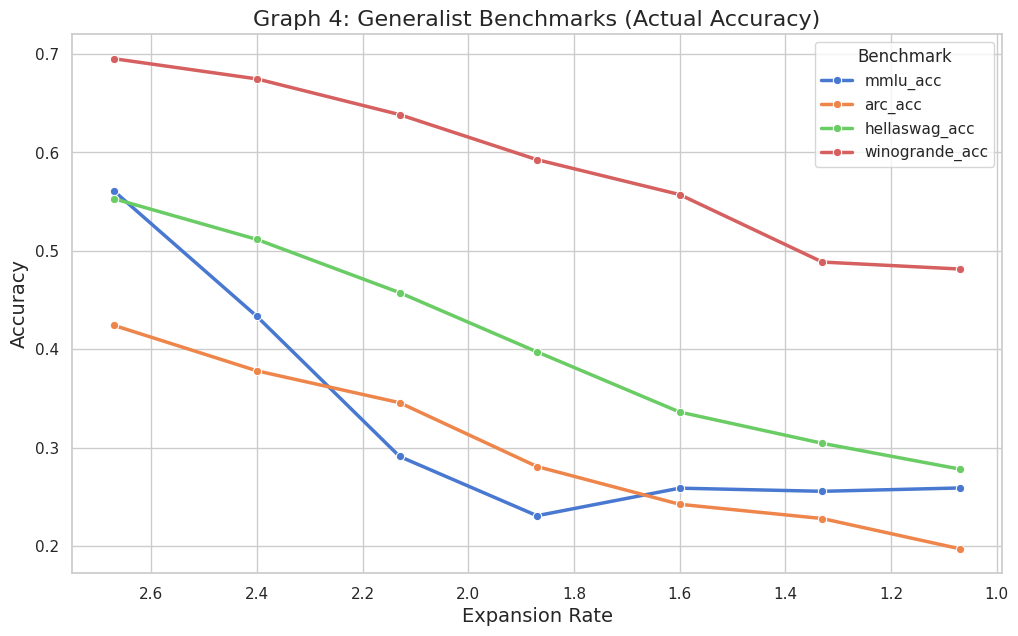

In [ ]:
# === Graph 4: Performance in generalist benchmarks (Real score) ===

df_generalist = df.melt(id_vars=['expansion_rate'],
                        value_vars=['mmlu_acc', 'arc_acc', 'hellaswag_acc', 'winogrande_acc'],
                        var_name='Benchmark',
                        value_name='Accuracy')

plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=df_generalist,
                  x='expansion_rate',
                  y='Accuracy',
                  hue='Benchmark',
                  marker='o',
                  linewidth=2.5)

ax.invert_xaxis()
ax.set_title('Graph 4: Generalist Benchmarks (Actual Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Expansion Rate')
ax.legend(title='Benchmark')
plt.show()

**Graph 4: Generalist Benchmarks (Actual Accuracy)**

This graph presents the absolute accuracy scores for four generalist reasoning and commonsense benchmarks across pruning levels for the Llama-3.2-3B model.

* **X-Axis (Expansion Rate):** Represents the GLU intermediate dimension to hidden dimension ratio, ranging from 2.67 (baseline, 0% pruning) down to 1.07 (60% pruning).

* **Y-Axis (Accuracy):** Shows raw accuracy scores on a 0-1 scale, allowing direct assessment of absolute model performance without normalization.

WinoGrande (red line) demonstrates the highest resilience to pruning among generalist benchmarks, maintaining approximately 0.695 accuracy at baseline and declining gradually to 0.675 at 2.40 expansion rate (10% pruning), 0.639 at 2.13 expansion rate (20% pruning), and stabilizing around 0.482 at extreme pruning levels (1.07 expansion rate). The relatively modest 31% degradation from baseline to 60% pruning suggests that coreference resolution capabilities are less dependent on MLP layer width.

MMLU (blue line) shows steep initial degradation from 0.561 at baseline to 0.433 at 2.40 expansion rate (10% pruning) and 0.291 at 2.13 expansion rate (20% pruning), representing a 48% accuracy loss at moderate pruning. The benchmark exhibits slight stabilization at higher pruning levels, maintaining approximately 0.259 accuracy between 1.60 and 1.07 expansion rates, indicating that multitask knowledge understanding suffers substantial but bounded degradation.

HellaSwag (green line) follows a similar monotonic decline from 0.554 at baseline to 0.514 at 2.40 expansion rate, continuing to 0.397 at 1.87 expansion rate (30% pruning) and reaching 0.278 at 1.07 expansion rate (60% pruning). The 50% performance reduction demonstrates that commonsense reasoning requiring contextual understanding is moderately vulnerable to width pruning.

ARC-Challenge (orange line) exhibits the steepest relative degradation, declining from 0.424 at baseline to 0.378 at 2.40 expansion rate (10% pruning), 0.281 at 1.87 expansion rate (30% pruning), and reaching 0.197 at 1.07 expansion rate (60% pruning), representing a 54% accuracy loss. This pronounced sensitivity suggests that grade-school science reasoning is particularly dependent on the representational capacity of MLP layers.

## Section 2: Exploratory Graphs (All Benchmarks)

This section provides a detailed breakdown of all benchmarks, grouped by task category. All plots in this section use the **actual scores** (not normalized) to allow for inspection of absolute performance.

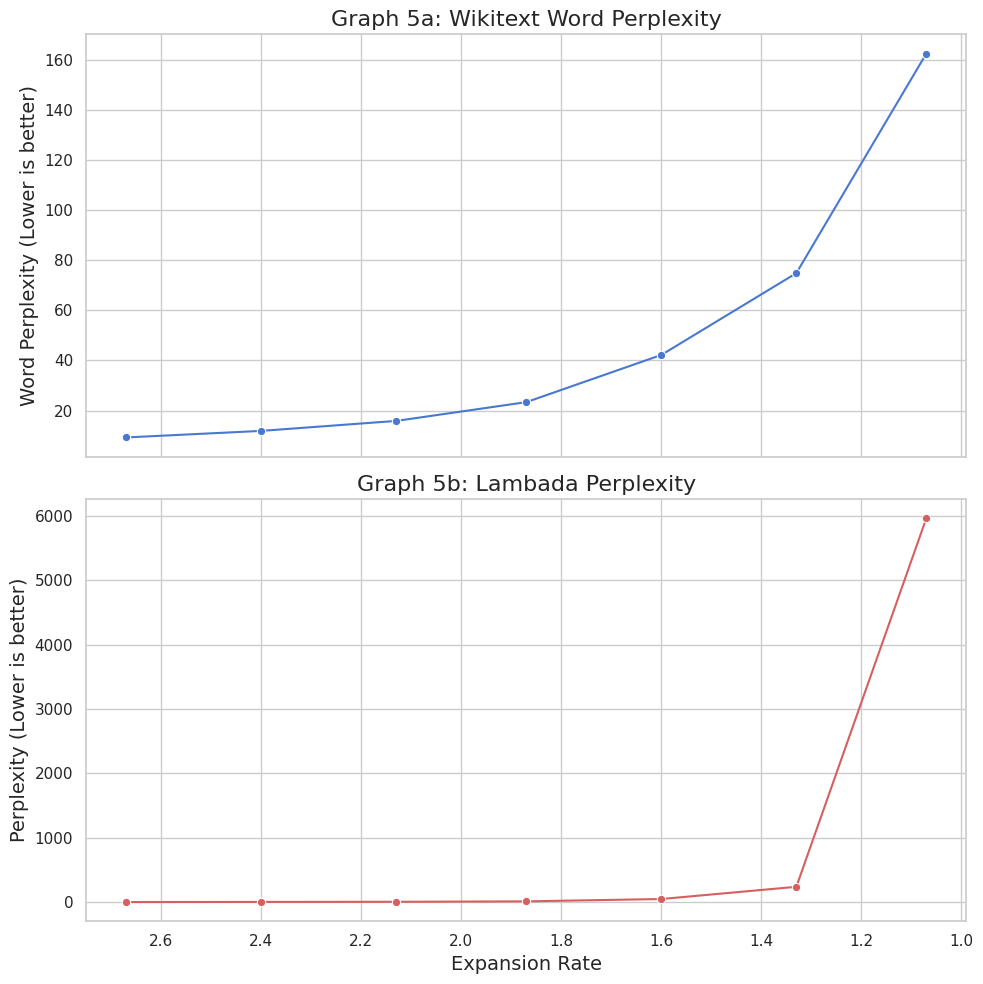

In [ ]:
# === Graph 5: Perplexity Analysis (Actual PPL) ===
# Note: Perplexity is on a logarithmic-like scale. A small pruning can lead to large jumps.

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Wikitext
sns.lineplot(data=df, x='expansion_rate', y='wikitext_ppl', ax=axs[0], marker='o', color='b')
axs[0].set_title('Graph 5a: Wikitext Word Perplexity')
axs[0].set_ylabel('Word Perplexity (Lower is better)')
axs[0].invert_xaxis()

# Lambada
sns.lineplot(data=df, x='expansion_rate', y='lambada_ppl', ax=axs[1], marker='o', color='r')
axs[1].set_title('Graph 5b: Lambada Perplexity')
axs[1].set_ylabel('Perplexity (Lower is better)')
axs[1].set_xlabel('Expansion Rate')

plt.tight_layout()
plt.show()

**Graph 5: Perplexity Analysis (Actual PPL)**

This graph presents perplexity degradation curves for WikiText and Lambada benchmarks, which assess language modeling quality through next-token prediction tasks.

* **X-Axis (Expansion Rate):** Represents the GLU intermediate dimension to hidden dimension ratio, ranging from 2.67 (baseline, 0% pruning) down to 1.07 (60% pruning).

* **Y-Axis (Perplexity):** Shows raw perplexity scores where lower values indicate better performance, with separate scales for each benchmark due to their different absolute ranges.

**Graph 5a: WikiText Word Perplexity** (blue line) exhibits gradual degradation from a baseline of 9.26 at 2.67 expansion rate, increasing modestly to 11.88 at 2.40 expansion rate (10% pruning) and 15.86 at 2.13 expansion rate (20% pruning). The degradation accelerates beyond 30% pruning, reaching 23.35 at 1.87 expansion rate, 42.18 at 1.60 expansion rate (40% pruning), and escalating to 162.47 at 1.07 expansion rate (60% pruning). This exponential growth pattern in the final pruning stages indicates that WikiText perplexity remains relatively stable until approximately 30% pruning, after which MLP capacity becomes critically insufficient for maintaining language modeling coherence.

**Graph 5b: Lambada Perplexity** (red line) demonstrates similar resilience at moderate pruning levels, maintaining relatively low perplexity scores of 3.95 at baseline, 6.11 at 2.40 expansion rate, 8.16 at 2.13 expansion rate, and 14.72 at 1.87 expansion rate (30% pruning). However, the benchmark exhibits catastrophic collapse at higher pruning levels, with perplexity exploding to 51.02 at 1.60 expansion rate, 240.72 at 1.33 expansion rate (50% pruning), and reaching 5960.46 at 1.07 expansion rate (60% pruning). The dramatic 1500× increase from baseline to 60% pruning reflects complete failure of the model's ability to predict sentence-final words requiring long-range contextual understanding, suggesting that Lambada's contextual prediction task is critically dependent on MLP representational capacity beyond the 30% pruning threshold.

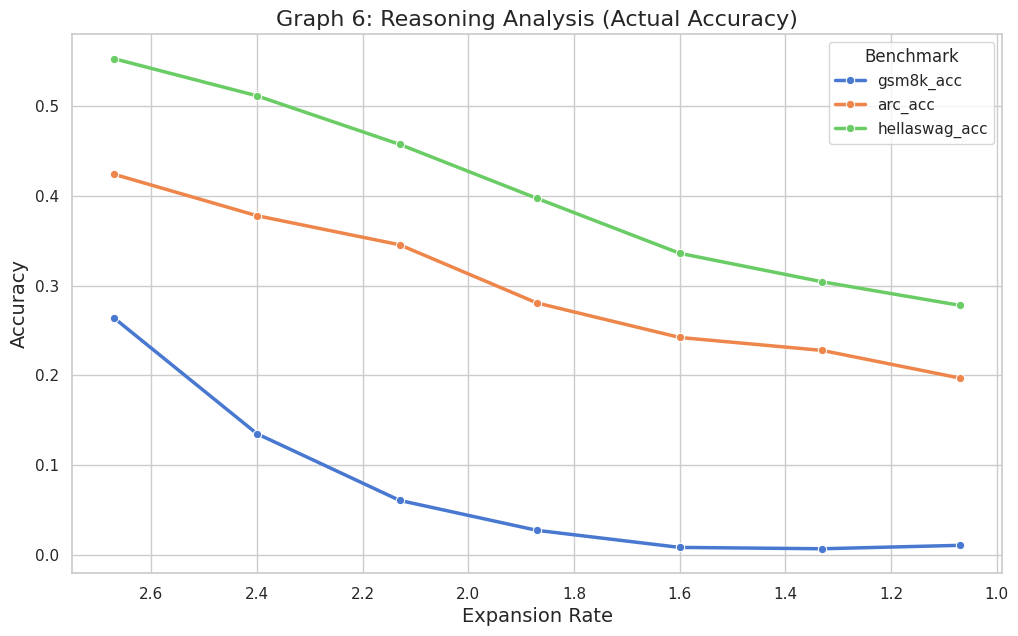

In [ ]:
# === Graph 6: Reasoning Analysis (Actual Accuracy) ===

df_reasoning = df.melt(id_vars=['expansion_rate'],
                         value_vars=['gsm8k_acc', 'arc_acc', 'hellaswag_acc'],
                         var_name='Benchmark',
                         value_name='Accuracy')

plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=df_reasoning,
                  x='expansion_rate',
                  y='Accuracy',
                  hue='Benchmark',
                  marker='o',
                  linewidth=2.5)

ax.invert_xaxis()
ax.set_title('Graph 6: Reasoning Analysis (Actual Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Expansion Rate')
ax.legend(title='Benchmark')
plt.show()

**Graph 6: Reasoning Analysis (Actual Accuracy)**

This graph visualizes the degradation patterns of three reasoning benchmarks under progressive width pruning of the Llama-3.2-3B model.

* **X-Axis (Expansion Rate):** Represents the GLU intermediate dimension to hidden dimension ratio, ranging from 2.67 (baseline, 0% pruning) down to 1.07 (60% pruning).

* **Y-Axis (Accuracy):** Shows the absolute accuracy scores for each benchmark, allowing direct comparison of performance levels and degradation trajectories.

The three benchmarks exhibit markedly different vulnerability profiles.

GSM8K (blue line) demonstrates the steepest degradation, declining from 0.26 at baseline to approximately 0.01 at 1.33 expansion rate, representing near-complete performance collapse. This chain-of-thought mathematical reasoning task shows minimal degradation tolerance beyond the 2.4 expansion rate threshold.

ARC-Challenge (orange line) exhibits moderate fragility, declining steadily from 0.42 to 0.20 across the pruning spectrum, maintaining approximately 50% relative performance even at extreme pruning levels.

HellaSwag (green line) demonstrates gradual degradation curve, starting at 0.55 and declining to 0.28 at 1.07 expansion rate.

These differential degradation patterns support the hypothesis that mathematical reasoning capabilities requiring multi-step inference are more dependent on MLP layer width than commonsense reasoning tasks. The divergence in degradation curves suggests that different cognitive functions may be encoded with varying degrees of redundancy within the GLU architecture.

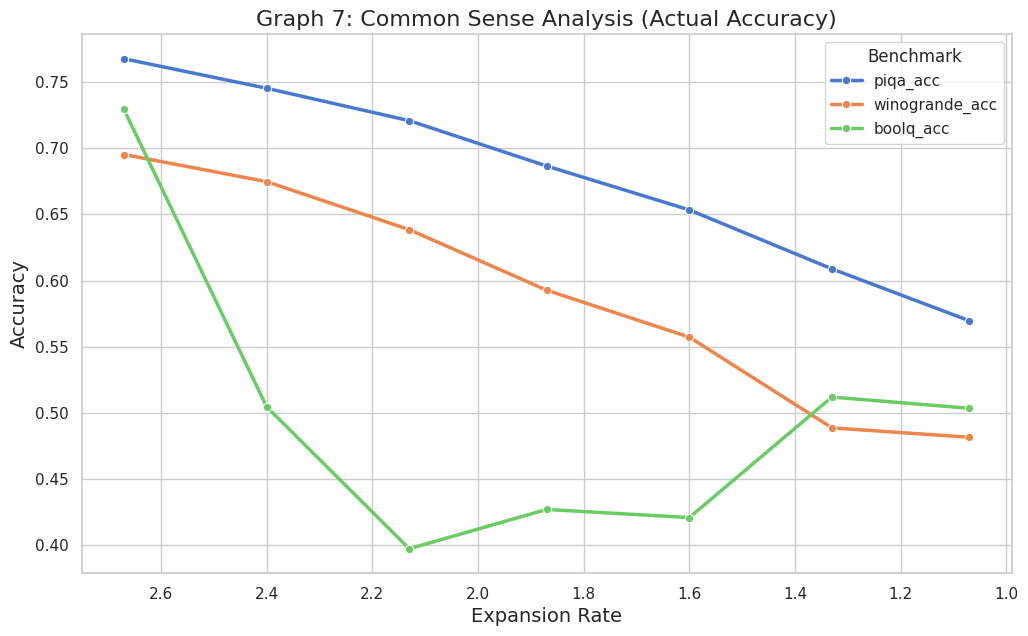

In [ ]:
# === Graph 7: Common Sense Analysis (Actual Accuracy) ===

df_commonsense = df.melt(id_vars=['expansion_rate'],
                           value_vars=['piqa_acc', 'winogrande_acc', 'boolq_acc'],
                           var_name='Benchmark',
                           value_name='Accuracy')

plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=df_commonsense,
                  x='expansion_rate',
                  y='Accuracy',
                  hue='Benchmark',
                  marker='o',
                  linewidth=2.5)

ax.invert_xaxis()
ax.set_title('Graph 7: Common Sense Analysis (Actual Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Expansion Rate')
ax.legend(title='Benchmark')
plt.show()

**Graph 7: Common Sense Analysis (Actual Accuracy)**

This graph visualizes the performance trajectories of three common sense reasoning benchmarks across different pruning levels in the Llama-3.2-3B model.

**X-Axis (Expansion Rate):** Represents the GLU intermediate dimension to hidden dimension ratio, ranging from 2.67 (baseline, 0% pruning) down to 1.07 (60% pruning).

**Y-Axis (Accuracy):** Shows the absolute accuracy scores for each benchmark, enabling direct assessment of performance degradation patterns.

The three benchmarks display distinct behavioral patterns under pruning.

PIQA (blue line) demonstrates consistent monotonic degradation, declining steadily from 0.77 at baseline to 0.57 at 1.07 expansion rate, representing approximately 26% performance loss.

WinoGrande (orange line) exhibits similar gradual degradation, decreasing from 0.70 to 0.48 across the pruning spectrum.

BoolQ (green line) shows notably non-monotonic behavior, with an initial sharp decline from 0.73 to 0.40 at 2.13 expansion rate, followed by stabilization and partial recovery to 0.51 at 1.33 expansion rate, before plateauing at approximately 0.50 through extreme pruning levels. BoolQ's unexpected recovery pattern at higher pruning levels suggests that this binary question-answering task may benefit from reduced parameter redundancy, potentially indicating that excessive model capacity introduces noise in simple yes/no decision boundaries.

The divergent trajectories between linear degradation (PIQA, WinoGrande) and non-monotonic patterns (BoolQ) suggest that common sense reasoning benchmarks are not uniformly affected by width pruning, with task complexity and answer space size potentially influencing pruning tolerance.

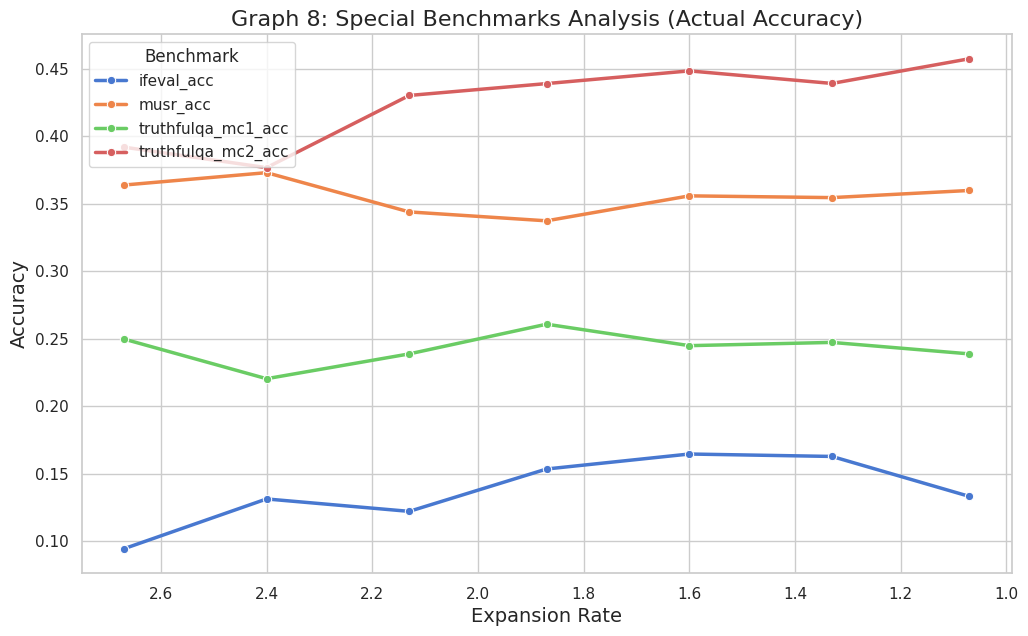

In [ ]:
# === Graph 8: Special Benchmarks Analysis (Actual Accuracy) ===
# This plot clearly shows the divergence between mc1 and mc2 for TruthfulQA

df_special = df.melt(id_vars=['expansion_rate'],
                     value_vars=['ifeval_acc', 'musr_acc', 'truthfulqa_mc1_acc', 'truthfulqa_mc2_acc'],
                     var_name='Benchmark',
                     value_name='Accuracy')

plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=df_special,
                  x='expansion_rate',
                  y='Accuracy',
                  hue='Benchmark',
                  marker='o',
                  linewidth=2.5)

ax.invert_xaxis()
ax.set_title('Graph 8: Special Benchmarks Analysis (Actual Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Expansion Rate')
ax.legend(title='Benchmark')
plt.show()

**Graph 8: Special Benchmarks Analysis (Actual Accuracy)**

This graph visualizes the performance of instruction-following, multi-step reasoning, and truthfulness benchmarks across pruning levels in the Llama-3.2-3B model.

* **X-Axis (Expansion Rate):** Represents the GLU intermediate dimension to hidden dimension ratio, ranging from 2.67 (baseline, 0% pruning) down to 1.07 (60% pruning).

* **Y-Axis (Accuracy):** Shows the absolute accuracy scores for each benchmark, revealing performance trends under progressive width pruning.

The four benchmarks exhibit contrasting behaviors that challenge conventional pruning assumptions.

TruthfulQA-MC2 (red line) demonstrates consistent improvement with pruning, rising from 0.39 at baseline to 0.46 at 1.07 expansion rate, representing approximately 17% performance gain. This monotonic improvement suggests that reduced parameter capacity may limit the model's ability to generate plausible but incorrect responses.

MUSR (orange line) shows relative stability with minor fluctuations, maintaining performance between 0.34 and 0.37 across all pruning levels, indicating robustness in multi-step reasoning capabilities.

TruthfulQA-MC1 (green line) displays modest variation around 0.24-0.25 without clear directional trends.

IFEval (blue line) exhibits initial improvement from 0.09 to 0.16 at moderate pruning (1.6 expansion rate), followed by decline to 0.13 at extreme pruning.

The divergent patterns between TruthfulQA variants (MC1 stable, MC2 improving) and the general improvement trend in instruction-following capabilities at moderate pruning levels suggest that width pruning may selectively enhance certain model behaviors.

The observed improvements in truthfulness and instruction-following contradict the typical degradation narrative, indicating that these capabilities may benefit from reduced representational capacity or that baseline models contain interfering parameters.

## 📊 **Session Summary: Benchmark and Capability Analysis (3B)**

This analysis session visualizes the complete benchmark results for the Llama-3.2-3B model, examining the impact of structured width pruning by using the **`expansion_rate`** as the primary independent variable. The visualizations directly test the "capability trade-off" hypothesis, identifying which capabilities are "Fragile" (degrade with pruning) and which are "Robust" (remain stable or improve).

The key findings from the graphs are as follows:

1.  **"Fragile" Capabilities Collapse:** Knowledge-intensive and complex reasoning benchmarks (categorized as "Fragile") consistently degrade as the expansion rate is reduced. This is clearly shown in **Graph 1**, **Graph 5**, and **Graph 6**.
2.  **Selective Degradation:** The erosion is not uniform. **GSM8K** (multi-step math reasoning) is the *most fragile*, showing the steepest collapse and reaching near-zero performance by the 1.60 expansion rate (**Graph 6**). Commonsense reasoning (HellaSwag, ARC) and language modeling (WikiText) degrade more gracefully.
3.  **"Robust" Capabilities Improve:** In stark contrast, capabilities related to instruction-following and core reasoning (categorized as "Robust") are highly resilient. **Graph 2** and **Graph 8** show they are either stable (MUSR) or consistently *improve* relative to the baseline as the model is pruned.
4.  **Instruction Following (IFEval) Peaks:** The most dramatic improvement is seen in **IFEval** (instruction following), which peaks at **+74%** (174% of baseline) at a 1.60 expansion rate (40% pruning), as shown in **Graph 2**.
5.  **Truthfulness (TruthfulQA) Improves:** **TruthfulQA-MC2** shows a steady, consistent *improvement* as pruning increases, reaching +17% (117% of baseline) at the most extreme pruning level (1.07 expansion rate), suggesting pruning may reduce memorized false information (**Graph 8**).
6.  **Non-Monotonic Behavior (BoolQ):** The **BoolQ** benchmark shows a unique *non-monotonic* pattern. Its accuracy drops sharply but then *recovers* at moderate-to-high pruning levels, indicating some simple reasoning tasks might benefit from reduced model capacity (**Graph 7**).
7.  **Generalist Benchmark Degradation:** Most generalist benchmarks (MMLU, ARC, WinoGrande, PIQA), when viewed by their *absolute* (non-normalized) accuracy, show a steady, monotonic degradation, confirming the selective erosion of general knowledge (**Graph 4** & **Graph 7**).
8.  **The "Capability Trade-Off":** **Graph 3** provides the clearest visualization of the core hypothesis. It aggregates the two categories, showing the "Fragile_Avg" (red line) collapsing while the "Robust_Avg" (green line) consistently improves, peaking at +28% (128% of baseline) at the 1.60 expansion rate.
9.  **Optimal Pruning Point:** Based on **Graph 3**, the **optimal trade-off point** for the Llama-3.2-3B model is identified at **10% pruning (2.40 expansion rate)**. At this level, robust capabilities improve significantly (to 112%), while fragile capabilities retain a majority of their performance (65%).

This analysis confirms the "selective capacity erosion" hypothesis. Pruning GLU layers is not a simple act of degradation but a complex trade-off. It erodes knowledge-intensive capabilities (like GSM8K and MMLU) while simultaneously enhancing or preserving core reasoning and instruction-following abilities (like IFEval and TruthfulQA-MC2). The 10% pruning level (2.40 expansion rate) represents a balanced configuration where the gains in reasoning may offset the acceptable losses in knowledge for many applications.